In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
df=pd.read_excel('Readmission dataset.xlsx')
df.head()

,Patient_Nbr,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,...,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed,Readmitted
0,8390,Caucasian,Male,[70-80),Unknown,Not Available,Discharged,Not Available,Below 3,Unknown,...,No,No,No,No,No,No,No,No,No,Yes
1,20012,Caucasian,Male,[60-70),Unknown,Not Available,Discharged,Not Available,Between 03 to 06,HM,...,No,Steady,No,No,No,No,No,No,Yes,Yes
2,50903,Caucasian,Female,[70-80),Unknown,Emergency,Discharged,Referral,Between 03 to 06,Unknown,...,No,No,No,No,No,No,No,No,No,Yes
3,50636,Caucasian,Male,[50-60),Unknown,Not Available,Left AMA,Emergency Room,Below 3,Unknown,...,No,Steady,No,No,No,No,No,No,Yes,No
4,205,Caucasian,Female,[40-50),Unknown,Emergency,Discharged,Emergency Room,Below 3,HM,...,No,Up,No,No,No,No,No,Ch,Yes,No


In [7]:
df1=pd.read_excel('Readmission dataset - Score.xlsx')
df1.head()

,Patient_Nbr,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,...,Examide,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed
0,12866,Caucasian,Male,[80-90),Unknown,Not Available,Discharged,Referral,Above 9,Unknown,...,No,No,Steady,No,No,No,No,No,Ch,Yes
1,27788,Caucasian,Male,[50-60),Unknown,Emergency,Discharged,Emergency Room,Between 03 to 06,MC,...,No,No,Down,No,No,No,No,No,Ch,Yes
2,50211,Caucasian,Female,[40-50),Unknown,Emergency,Discharged,Referral,Below 3,HM,...,No,No,No,No,No,No,No,No,No,No
3,79,Caucasian,Male,[80-90),Unknown,Emergency,Discharged,Emergency Room,Between 03 to 06,MC,...,No,No,No,No,No,No,No,No,No,Yes
4,47633,Caucasian,Female,[70-80),Unknown,Not Available,Discharged,Not Available,Between 03 to 06,Unknown,...,No,No,No,No,No,No,No,No,No,Yes


In [8]:
df.shape,df1.shape

((36538, 43), (2035, 42))

In [9]:
df.columns

Index(['Patient_Nbr', 'Race', 'Gender', 'Age', 'Weight', 'Admission Type',
       'Discharge Disposition', 'Admission Source', 'Days In Hospital',
       'Payer_Code', 'Medical_Specialty', 'Num_Lab_Procedures',
       'Num_Procedures', 'Num_Medications', 'Number_Diagnoses',
       'Max_Glu_Serum', 'A1Cresult', 'Metformin', 'Repaglinide', 'Nateglinide',
       'Chlorpropamide', 'Glimepiride', 'Acetohexamide', 'Glipizide',
       'Glyburide', 'Tolbutamide', 'Pioglitazone', 'Rosiglitazone', 'Acarbose',
       'Miglitol', 'Troglitazone', 'Tolazamide', 'Examide', 'Citoglipton',
       'Insulin', 'Glyburide-Metformin', 'Glipizide-Metformin',
       'Glimepiride-Pioglitazone', 'Metformin-Rosiglitazone',
       'Metformin-Pioglitazone', 'Change', 'Diabetesmed', 'Readmitted'],
      dtype='object')

In [10]:
df1.columns

Index(['Patient_Nbr', 'Race', 'Gender', 'Age', 'Weight', 'Admission Type',
       'Discharge Disposition', 'Admission Source', 'Days In Hospital',
       'Payer_Code', 'Medical_Specialty', 'Num_Lab_Procedures',
       'Num_Procedures', 'Num_Medications', 'Number_Diagnoses',
       'Max_Glu_Serum', 'A1Cresult', 'Metformin', 'Repaglinide', 'Nateglinide',
       'Chlorpropamide', 'Glimepiride', 'Acetohexamide', 'Glipizide',
       'Glyburide', 'Tolbutamide', 'Pioglitazone', 'Rosiglitazone', 'Acarbose',
       'Miglitol', 'Troglitazone', 'Tolazamide', 'Examide', 'Citoglipton',
       'Insulin', 'Glyburide-Metformin', 'Glipizide-Metformin',
       'Glimepiride-Pioglitazone', 'Metformin-Rosiglitazone',
       'Metformin-Pioglitazone', 'Change', 'Diabetesmed'],
      dtype='object')

In [11]:
df_num=df.select_dtypes(np.number)
df_num.columns

Index(['Patient_Nbr', 'Num_Lab_Procedures', 'Num_Procedures',
       'Num_Medications'],
      dtype='object')

In [12]:
df_cat=df.select_dtypes(object)
df_cat.columns

Index(['Race', 'Gender', 'Age', 'Weight', 'Admission Type',
       'Discharge Disposition', 'Admission Source', 'Days In Hospital',
       'Payer_Code', 'Medical_Specialty', 'Number_Diagnoses', 'Max_Glu_Serum',
       'A1Cresult', 'Metformin', 'Repaglinide', 'Nateglinide',
       'Chlorpropamide', 'Glimepiride', 'Acetohexamide', 'Glipizide',
       'Glyburide', 'Tolbutamide', 'Pioglitazone', 'Rosiglitazone', 'Acarbose',
       'Miglitol', 'Troglitazone', 'Tolazamide', 'Examide', 'Citoglipton',
       'Insulin', 'Glyburide-Metformin', 'Glipizide-Metformin',
       'Glimepiride-Pioglitazone', 'Metformin-Rosiglitazone',
       'Metformin-Pioglitazone', 'Change', 'Diabetesmed', 'Readmitted'],
      dtype='object')

In [13]:
df.describe()

,Patient_Nbr,Num_Lab_Procedures,Num_Procedures,Num_Medications
count,36538.000000,36538.000000,36538.000000,36538.000000
mean,29217.279216,43.800646,1.332448,16.007171
std,16904.104318,19.137932,1.681195,8.109806
min,1.000000,1.000000,0.000000,1.000000
25%,14562.250000,32.000000,0.000000,10.000000
50%,29216.000000,45.000000,1.000000,15.000000
75%,43831.750000,57.000000,2.000000,20.000000
max,58504.000000,114.000000,6.000000,75.000000


### Std of Num_procedures is less hence can be removed 

In [14]:
df.describe(include=object)

,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,Medical_Specialty,...,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed,Readmitted
count,36538,36538,36538,36538,36538,36538,36538,36538,36538,36538,...,36538,36538,36538,36538,36538,36538,36538,36538,36538,36538
unique,6,3,10,10,5,6,4,4,5,9,...,1,4,4,2,1,1,1,2,2,2
top,Caucasian,Female,[70-80),Unknown,Emergency,Discharged,Emergency Room,Between 03 to 06,Unknown,Surgery,...,No,No,No,No,No,No,No,No,Yes,Yes
freq,27000,19913,9657,35137,25389,33919,19594,17838,18730,17444,...,36538,18715,36325,36534,36538,36538,36538,20205,27397,25432


In [15]:
for i in df_cat.columns:
    print(i,'Column:')
    print('Number of categories: ', df[i].nunique(),'\n')
    print('% of observations in ',i, ':')
    print(df[i].value_counts(normalize=True),'\n')

Race Column:
Number of categories:  6 

% of observations in  Race :
Caucasian          0.738957
AfricanAmerican    0.207921
Hispanic           0.018884
Unknown            0.017051
Other              0.012617
Asian              0.004571
Name: Race, dtype: float64 

Gender Column:
Number of categories:  3 

% of observations in  Gender :
Female             0.544994
Male               0.454978
Unknown/Invalid    0.000027
Name: Gender, dtype: float64 

Age Column:
Number of categories:  10 

% of observations in  Age :
[70-80)     0.264300
[60-70)     0.220674
[50-60)     0.169577
[80-90)     0.166594
[40-50)     0.095408
[30-40)     0.035634
[90-100)    0.025343
[20-30)     0.014943
[10-20)     0.006158
[0-10)      0.001368
Name: Age, dtype: float64 

Weight Column:
Number of categories:  10 

% of observations in  Weight :
Unknown      0.961656
[75-100)     0.016093
[50-75)      0.011057
[100-125)    0.007362
[125-150)    0.001451
[25-50)      0.001204
[0-25)       0.000629
[150-175)   

# Null value treatment

In [16]:
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missed=pd.concat([total,percent],axis=1,keys=['total','percent'])
missed
#No Null values

,total,percent
Patient_Nbr,0,0.0
Examide,0,0.0
Glyburide,0,0.0
Tolbutamide,0,0.0
Pioglitazone,0,0.0
Rosiglitazone,0,0.0
Acarbose,0,0.0
Miglitol,0,0.0
Troglitazone,0,0.0
Tolazamide,0,0.0


# checking of outliers

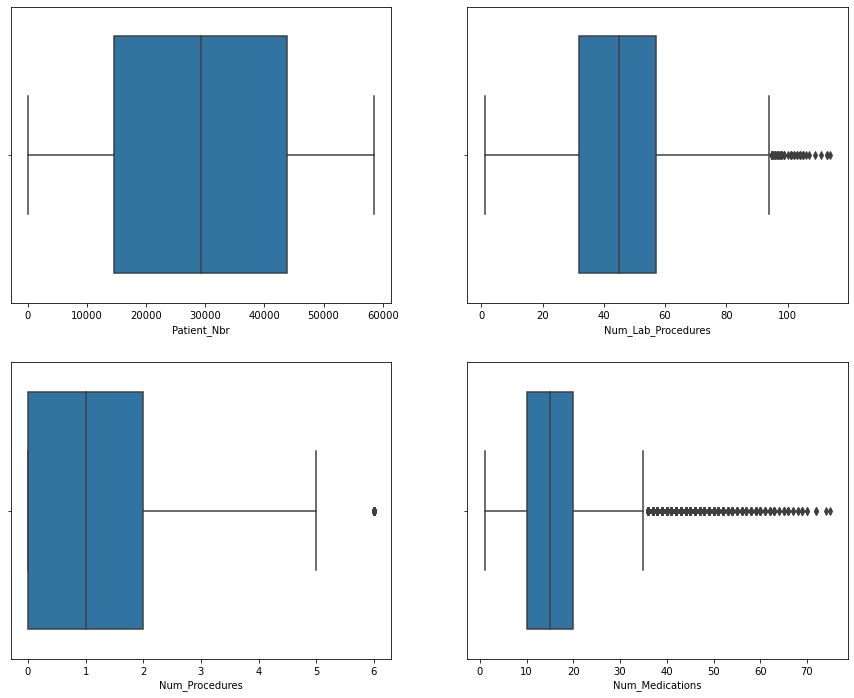

In [18]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=[15,12])
for i,j in zip(df.select_dtypes(np.number).columns,ax.flatten()):
    sb.boxplot(df[i],ax=j)
plt.show()
#Has outliers

# clipping of outliers

In [19]:
#clipping of outliers
def outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    low_lim=q1-(1.5*iqr)
    up_lim=q3+(1.5*iqr)
    
    for x in df[col]:
        if x>up_lim:
            df[col]=df[col].replace(to_replace=x,value=up_lim)
        elif x<low_lim:
            df[col]=df[col].replace(to_replace=x,value=low_lim)

In [20]:
for i in ['Num_Lab_Procedures','Num_Medications']:
    outliers(df,i)

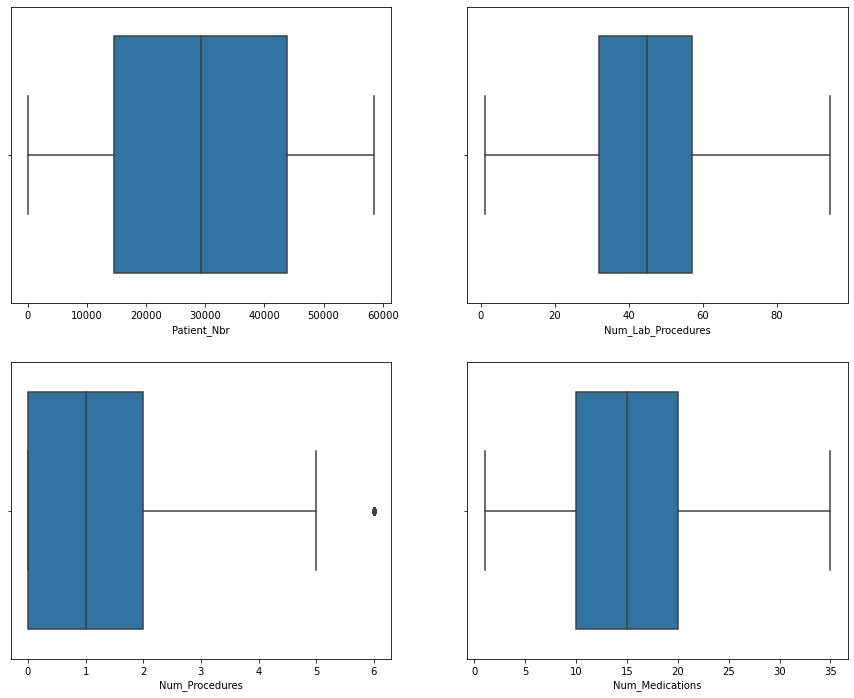

In [23]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=[15,12])
for i,j in zip(df.select_dtypes(np.number).columns,ax.flatten()):
    sb.boxplot(df[i],ax=j)
plt.show()

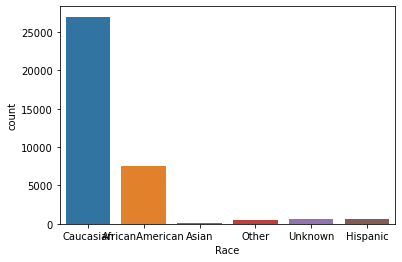

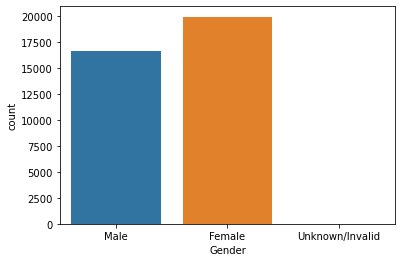

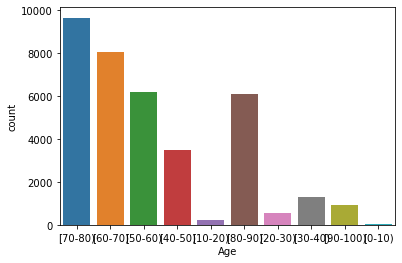

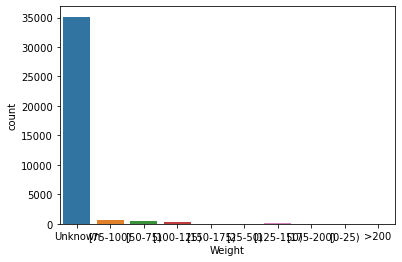

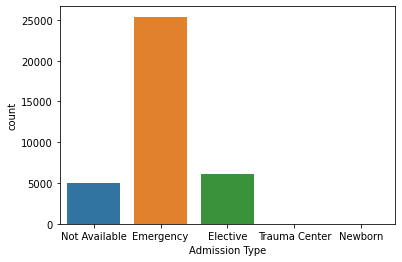

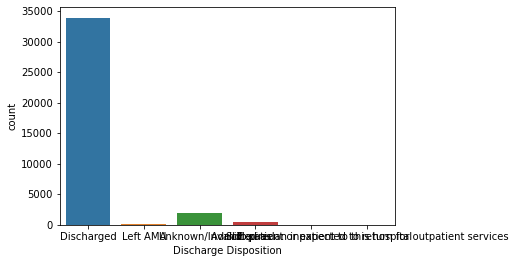

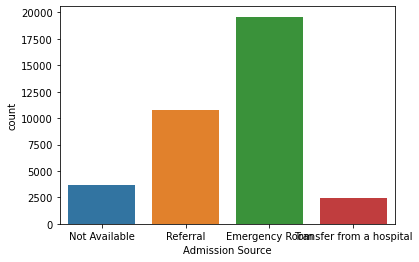

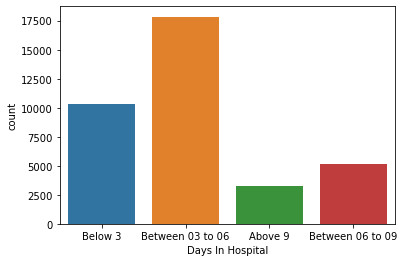

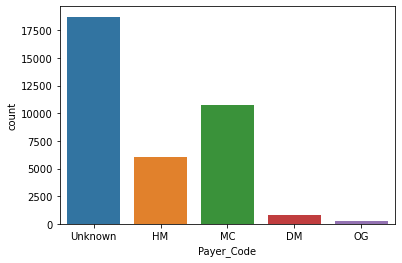

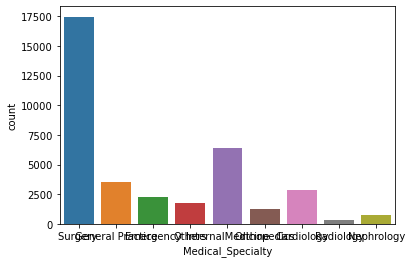

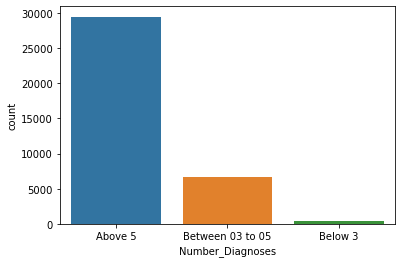

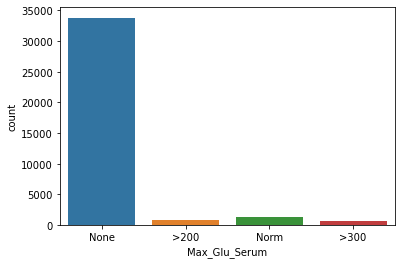

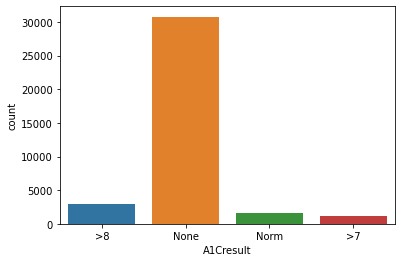

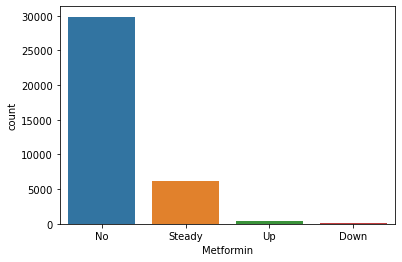

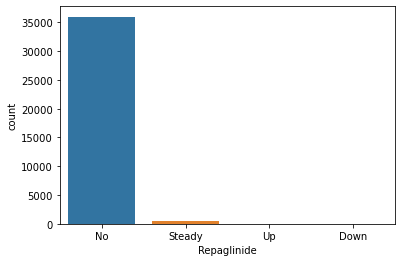

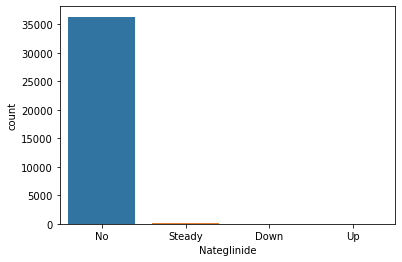

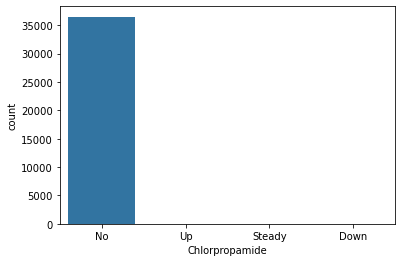

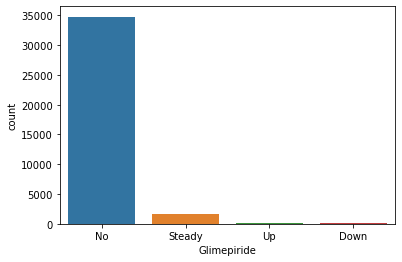

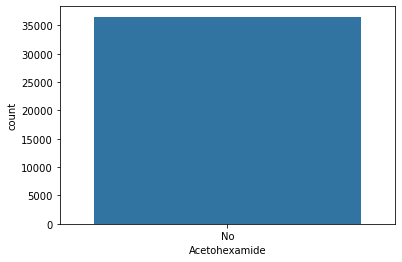

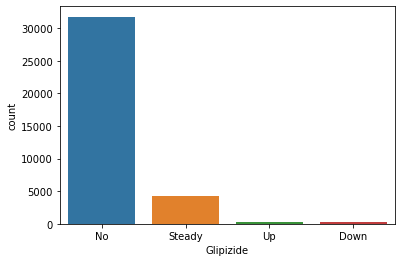

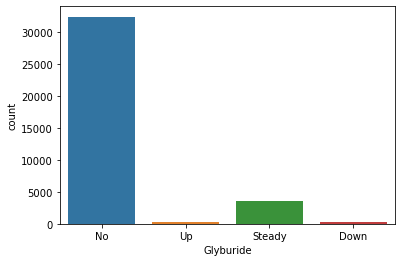

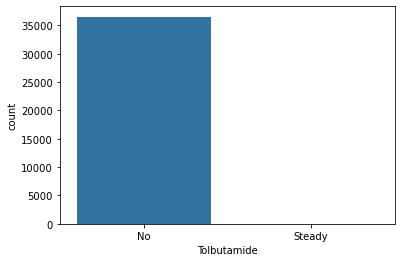

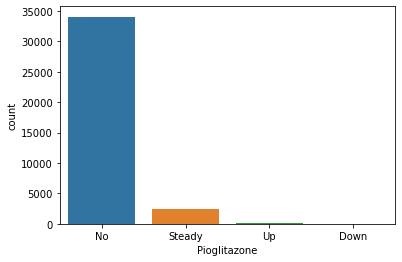

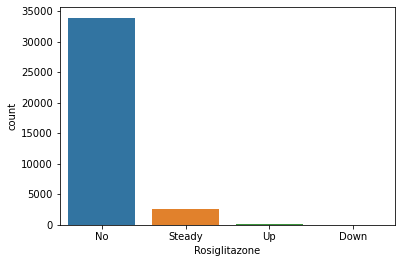

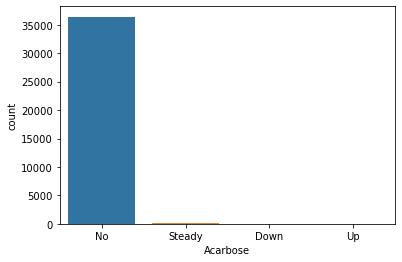

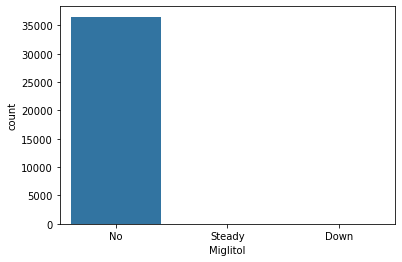

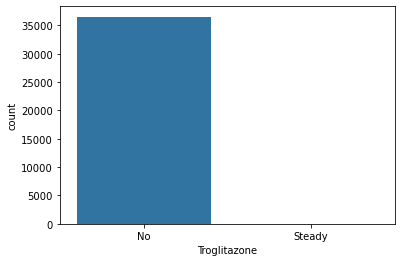

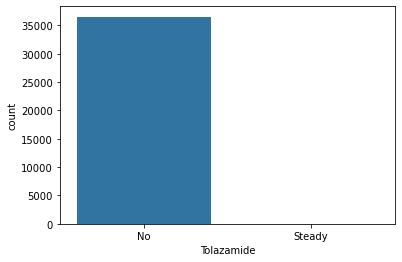

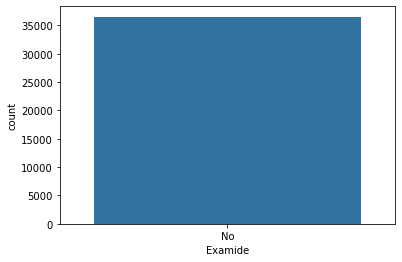

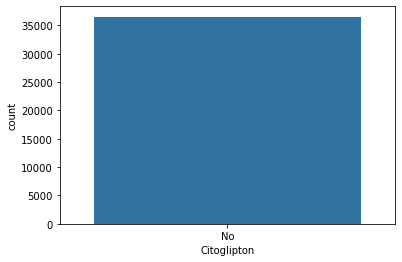

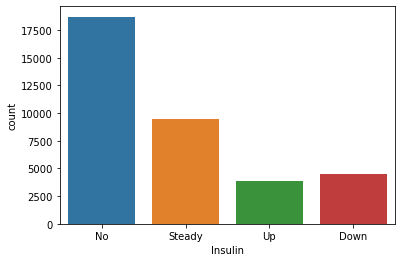

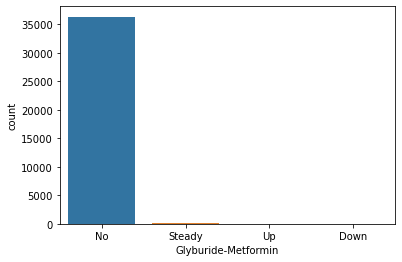

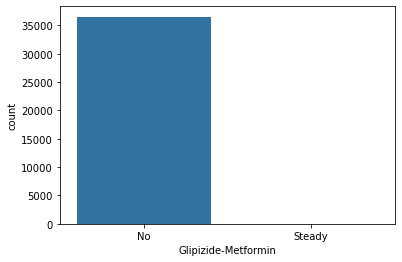

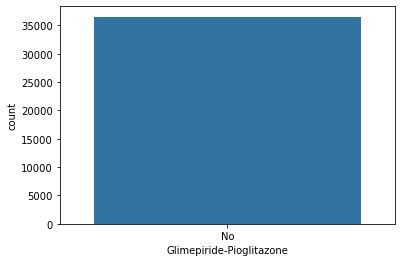

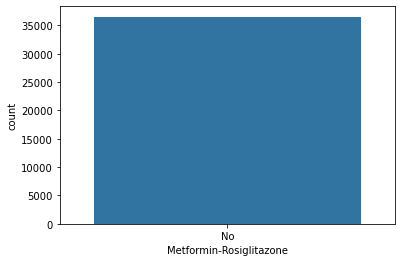

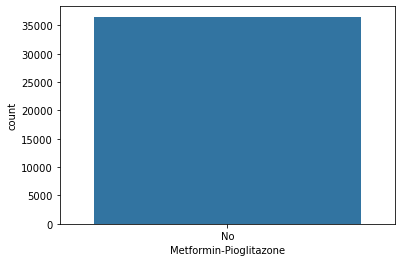

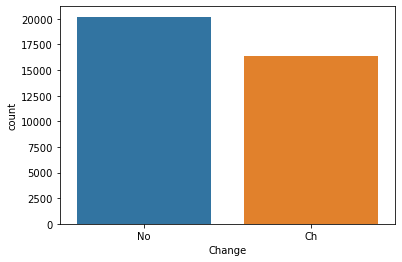

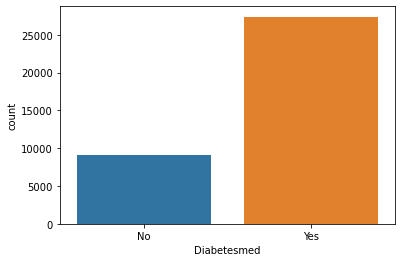

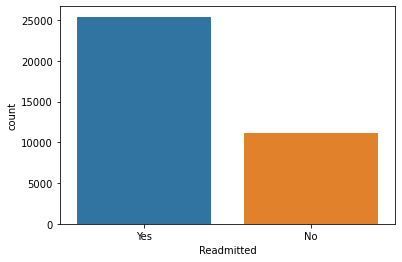

In [29]:
for i in(df.select_dtypes(object)):
    sb.countplot(df[i])
    plt.show()

# correlation matrix of Numeric features

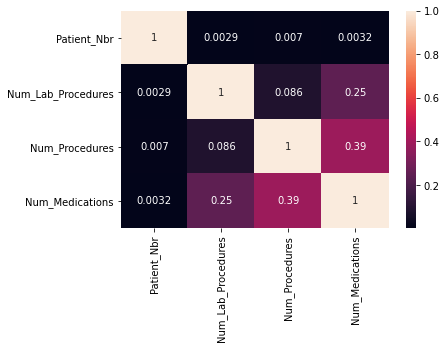

In [30]:
sb.heatmap(df.corr(),annot=True)
plt.show()

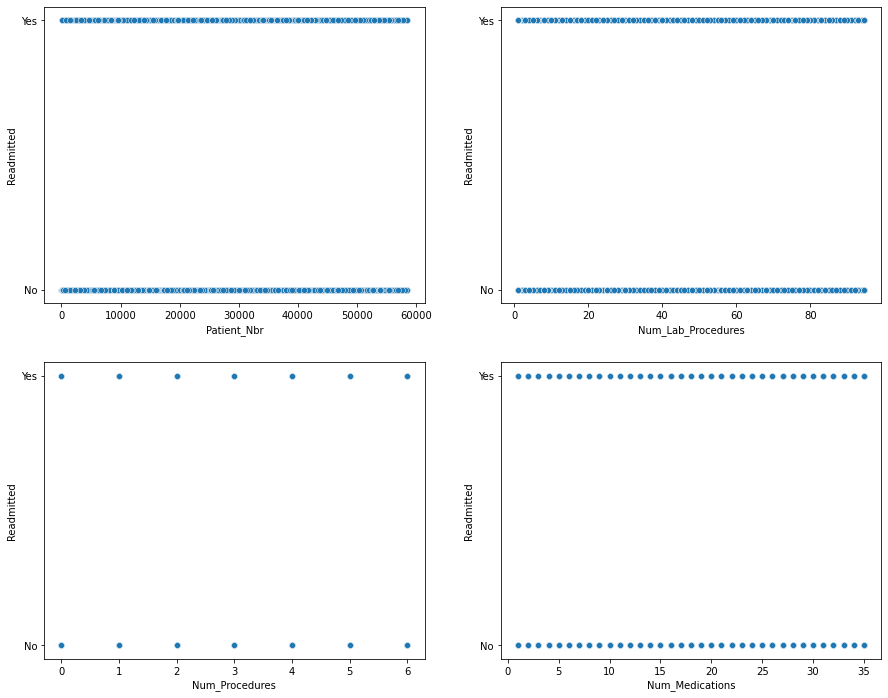

In [32]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=[15,12])
for i,j in zip(df_num.columns,ax.flatten()):
    sb.scatterplot(x=df[i],y=df['Readmitted'],ax=j)
plt.show()

### patient_nbr is irrelevant so can be removed or set as index

In [48]:
df2=df.set_index('Patient_Nbr')
df2.head()

,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,Medical_Specialty,...,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed,Readmitted
Patient_Nbr,,,,,,,,,,,,,,,,,,,,,
8390,Caucasian,Male,[70-80),Unknown,Not Available,Discharged,Not Available,Below 3,Unknown,Surgery,...,No,No,No,No,No,No,No,No,No,Yes
20012,Caucasian,Male,[60-70),Unknown,Not Available,Discharged,Not Available,Between 03 to 06,HM,Surgery,...,No,Steady,No,No,No,No,No,No,Yes,Yes
50903,Caucasian,Female,[70-80),Unknown,Emergency,Discharged,Referral,Between 03 to 06,Unknown,General Practice,...,No,No,No,No,No,No,No,No,No,Yes
50636,Caucasian,Male,[50-60),Unknown,Not Available,Left AMA,Emergency Room,Below 3,Unknown,Surgery,...,No,Steady,No,No,No,No,No,No,Yes,No
205,Caucasian,Female,[40-50),Unknown,Emergency,Discharged,Emergency Room,Below 3,HM,Surgery,...,No,Up,No,No,No,No,No,Ch,Yes,No


# Replacing not available and invalid valid values with mode of the columns

In [49]:
df2.Gender.value_counts()

Female             19913
Male               16624
Unknown/Invalid        1
Name: Gender, dtype: int64

In [54]:
df2.Gender.mode()

0    Female
dtype: object

In [55]:
df2['Gender'].replace('Unknown/Invalid','Female',inplace=True)

In [56]:
df2.Gender.value_counts()

Female    19914
Male      16624
Name: Gender, dtype: int64

In [57]:
df2.Weight.value_counts()

Unknown      35137
[75-100)       588
[50-75)        404
[100-125)      269
[125-150)       53
[25-50)         44
[0-25)          23
[150-175)       15
[175-200)        4
>200             1
Name: Weight, dtype: int64

In [60]:
df2.Weight.replace('Unknown','[75-100)',inplace=True)

In [61]:
df2.Weight.value_counts()

[75-100)     35725
[50-75)        404
[100-125)      269
[125-150)       53
[25-50)         44
[0-25)          23
[150-175)       15
[175-200)        4
>200             1
Name: Weight, dtype: int64

In [62]:
df2['Admission Type'].replace('Not Available','Emergency',inplace=True)

In [63]:
df2['Admission Type'].value_counts()

Emergency        30390
Elective          6140
Trauma Center        4
Newborn              4
Name: Admission Type, dtype: int64

In [64]:
df2['Admission Source'].replace('Not Available','Emergency Room',inplace=True)

In [65]:
df2['Admission Source'].value_counts()

Emergency Room              23260
Referral                    10808
Transfer from a hospital     2470
Name: Admission Source, dtype: int64

# Removal of Insignificant features

In [67]:
from scipy.stats import chi2_contingency
scol=[]
spval=[]
ss=[]
for n in df2.select_dtypes(include=object).columns:
    scol.append(n)
    cp=chi2_contingency(pd.crosstab(df2[n],df2['Readmitted']))[1]
    spval.append(round(cp,4))
    if(cp<0.05):
        ss.append('Significant')
    else:
        ss.append('Insignifcant')
a=pd.DataFrame({'Feature':scol,'P-Value':spval,'Significance':ss})
print(a)

                     Feature  P-Value  Significance
0                       Race   0.0000   Significant
1                     Gender   0.0275   Significant
2                        Age   0.0000   Significant
3                     Weight   0.0000   Significant
4             Admission Type   0.0000   Significant
5      Discharge Disposition   0.0000   Significant
6           Admission Source   0.0000   Significant
7           Days In Hospital   0.0000   Significant
8                 Payer_Code   0.0000   Significant
9          Medical_Specialty   0.0000   Significant
10          Number_Diagnoses   0.0000   Significant
11             Max_Glu_Serum   0.0000   Significant
12                 A1Cresult   0.0285   Significant
13                 Metformin   0.0000   Significant
14               Repaglinide   0.0003   Significant
15               Nateglinide   0.4275  Insignifcant
16            Chlorpropamide   0.4802  Insignifcant
17               Glimepiride   0.5263  Insignifcant
18          

In [72]:
b=[a.Feature[a.Significance=='Insignifcant']

[15                 Nateglinide
 16              Chlorpropamide
 17                 Glimepiride
 18               Acetohexamide
 20                   Glyburide
 21                 Tolbutamide
 22                Pioglitazone
 23               Rosiglitazone
 24                    Acarbose
 25                    Miglitol
 26                Troglitazone
 28                     Examide
 29                 Citoglipton
 32         Glipizide-Metformin
 33    Glimepiride-Pioglitazone
 34     Metformin-Rosiglitazone
 35      Metformin-Pioglitazone
 Name: Feature, dtype: object]

In [73]:
df2=df2.drop(['Nateglinide','Chlorpropamide',
 'Glimepiride','Acetohexamide','Glyburide','Tolbutamide','Pioglitazone','Rosiglitazone',
 'Acarbose','Miglitol','Troglitazone','Examide','Citoglipton','Glipizide-Metformin',
 'Glimepiride-Pioglitazone','Metformin-Rosiglitazone','Metformin-Pioglitazone'],axis=1)

In [75]:
df2.shape

(36538, 25)

In [78]:
from scipy.stats import f_oneway

tcol=[]
tpval=[]
ts=[]
for n in df2.select_dtypes(include='number').columns:
    tcol.append(n)
    g1=df2[n][df2['Readmitted']=='Yes']
    g2=df2[n][df2['Readmitted']=='No']
    
    s,p=f_oneway(g1,g2)
    tpval.append(round(p,4))
    if (p<=0.05):
        ts.append('Significant')
    else:
        ts.append('Insignifcant')
print(pd.DataFrame({'Feature':tcol,'P-Value':tpval,'Significance':ts}))

              Feature  P-Value  Significance
0  Num_Lab_Procedures   0.0000   Significant
1      Num_Procedures   0.9686  Insignifcant
2     Num_Medications   0.0000   Significant


In [79]:
df2=df2.drop(['Num_Procedures'],axis=1)

In [81]:
df2.shape

(36538, 24)

In [82]:
df2.head()

,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,Medical_Specialty,...,A1Cresult,Metformin,Repaglinide,Glipizide,Tolazamide,Insulin,Glyburide-Metformin,Change,Diabetesmed,Readmitted
Patient_Nbr,,,,,,,,,,,,,,,,,,,,,
8390,Caucasian,Male,[70-80),[75-100),Emergency,Discharged,Emergency Room,Below 3,Unknown,Surgery,...,>8,No,No,No,No,No,No,No,No,Yes
20012,Caucasian,Male,[60-70),[75-100),Emergency,Discharged,Emergency Room,Between 03 to 06,HM,Surgery,...,None,No,No,No,No,Steady,No,No,Yes,Yes
50903,Caucasian,Female,[70-80),[75-100),Emergency,Discharged,Referral,Between 03 to 06,Unknown,General Practice,...,None,No,No,No,No,No,No,No,No,Yes
50636,Caucasian,Male,[50-60),[75-100),Emergency,Left AMA,Emergency Room,Below 3,Unknown,Surgery,...,None,No,No,No,No,Steady,No,No,Yes,No
205,Caucasian,Female,[40-50),[75-100),Emergency,Discharged,Emergency Room,Below 3,HM,Surgery,...,None,No,No,No,No,Up,No,Ch,Yes,No


In [83]:
df_final=df2
df_final.head()

,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,Medical_Specialty,...,A1Cresult,Metformin,Repaglinide,Glipizide,Tolazamide,Insulin,Glyburide-Metformin,Change,Diabetesmed,Readmitted
Patient_Nbr,,,,,,,,,,,,,,,,,,,,,
8390,Caucasian,Male,[70-80),[75-100),Emergency,Discharged,Emergency Room,Below 3,Unknown,Surgery,...,>8,No,No,No,No,No,No,No,No,Yes
20012,Caucasian,Male,[60-70),[75-100),Emergency,Discharged,Emergency Room,Between 03 to 06,HM,Surgery,...,None,No,No,No,No,Steady,No,No,Yes,Yes
50903,Caucasian,Female,[70-80),[75-100),Emergency,Discharged,Referral,Between 03 to 06,Unknown,General Practice,...,None,No,No,No,No,No,No,No,No,Yes
50636,Caucasian,Male,[50-60),[75-100),Emergency,Left AMA,Emergency Room,Below 3,Unknown,Surgery,...,None,No,No,No,No,Steady,No,No,Yes,No
205,Caucasian,Female,[40-50),[75-100),Emergency,Discharged,Emergency Room,Below 3,HM,Surgery,...,None,No,No,No,No,Up,No,Ch,Yes,No


# Encoding of Categorical variables

In [85]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df_final.select_dtypes(object).columns:
    df_final[i]=l.fit_transform(df_final[i])

# Final Dataset

In [86]:
df_final.head()

,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,Medical_Specialty,...,A1Cresult,Metformin,Repaglinide,Glipizide,Tolazamide,Insulin,Glyburide-Metformin,Change,Diabetesmed,Readmitted
Patient_Nbr,,,,,,,,,,,,,,,,,,,,,
8390,2,1,7,8,1,1,0,1,4,8,...,1,1,1,1,0,1,1,1,0,1
20012,2,1,6,8,1,1,0,2,1,8,...,2,1,1,1,0,2,1,1,1,1
50903,2,0,7,8,1,1,1,2,4,2,...,2,1,1,1,0,1,1,1,0,1
50636,2,1,5,8,1,3,0,1,4,8,...,2,1,1,1,0,2,1,1,1,0
205,2,0,4,8,1,1,0,1,1,8,...,2,1,1,1,0,3,1,0,1,0


In [89]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [90]:
x=df_final.drop('Readmitted',axis=1)
y=df_final.Readmitted
xc=sm.add_constant(x)

In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(xc,y,test_size=0.30,random_state=10)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((25576, 24), (10962, 24), (25576,), (10962,))

In [93]:
f_oneway(ytrain,ytest,y)

F_onewayResult(statistic=0.5690015578865193, pvalue=0.5660928732031498)

#### above test proves that they are from the same population

In [94]:
ytrain.value_counts()

1    17759
0     7817
Name: Readmitted, dtype: int64

In [115]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

In [100]:
result=pd.DataFrame(columns=['Model','Misclassifications','type1 error','type2 error','precision','recall','accuracy','f1','auc'])

In [106]:
l=sm.Logit(ytrain,xtrain).fit()
l.summary()

Optimization terminated successfully.
         Current function value: 0.542145
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Readmitted   No. Observations:                25576
Model:                          Logit   Df Residuals:                    25552
Method:                           MLE   Df Model:                           23
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.1193
Time:                        15:34:58   Log-Likelihood:                -13866.
converged:                       True   LL-Null:                       -15744.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.0921      0.363      8.514      0.000       2.380       3.804
Race                      0.0131      0.015      0.855      0.392      -0.017       0.043
Gender                   -0.0372      0.030     -1.247      0.212      -0.096       0.021
Age                       0.0254      0.010      2.662      0.008       0.007       0.044
Weight                   -0.1209      0.030     -4.015      0.000      -0.180      -0.062
Admission Type            0.0925      0.043      2.130      0.033       0.007       0.178
Discharge Disposition    -0.3448      0.016    -22.153      0.000      -0.375      -0.314
Admission Source         -0.2927      0.026    -11.177      0.000      -0.344      -0.241
Days In Hospital          0.0195      0.018      1.064      0.287      -0.016       0.055
Payer_Code                0.0959      0.012      8.011      0.000       0.072       0.119
Medical_Specialty        -0.0118      0.005     -2.331      0.020      -0.022      -0.002
Num_Lab_Procedures       -0.0003      0.001     -0.303      0.762      -0.002       0.001
Num_Medications           0.0153      0.002      6.725      0.000       0.011       0.020
Number_Diagnoses         -0.7731      0.018    -41.828      0.000      -0.809      -0.737
Max_Glu_Serum            -0.0751      0.041     -1.819      0.069      -0.156       0.006
A1Cresult                -0.0481      0.030     -1.582      0.114      -0.108       0.012
Metformin                -0.1491      0.036     -4.099      0.000      -0.220      -0.078
Repaglinide               0.2759      0.120      2.304      0.021       0.041       0.511
Glipizide                 0.0368      0.040      0.911      0.362      -0.042       0.116
Tolazamide               -1.8129      0.713     -2.542      0.011      -3.211      -0.415
Insulin                  -0.3431      0.019    -18.064      0.000      -0.380      -0.306
Glyburide-Metformin      -0.0970      0.173     -0.559      0.576      -0.437       0.243
Change                   -0.2429      0.036     -6.750      0.000      -0.313      -0.172
Diabetesmed              -0.3877      0.042     -9.167      0.000      -0.471      -0.305
=========================================================================================
"""

In [107]:
ypred_prob = l.predict(xtest)
ypred = [ 0 if x < 0.5 else 1 for x in ypred_prob]

In [108]:
cm = confusion_matrix(ytest, ypred)
cm

array([[1212, 2077],
       [ 707, 6966]], dtype=int64)

In [109]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.63      0.37      0.47      3289
           1       0.77      0.91      0.83      7673

    accuracy                           0.75     10962
   macro avg       0.70      0.64      0.65     10962
weighted avg       0.73      0.75      0.72     10962



In [111]:
plt.rcParams['figure.figsize']=[15,8]

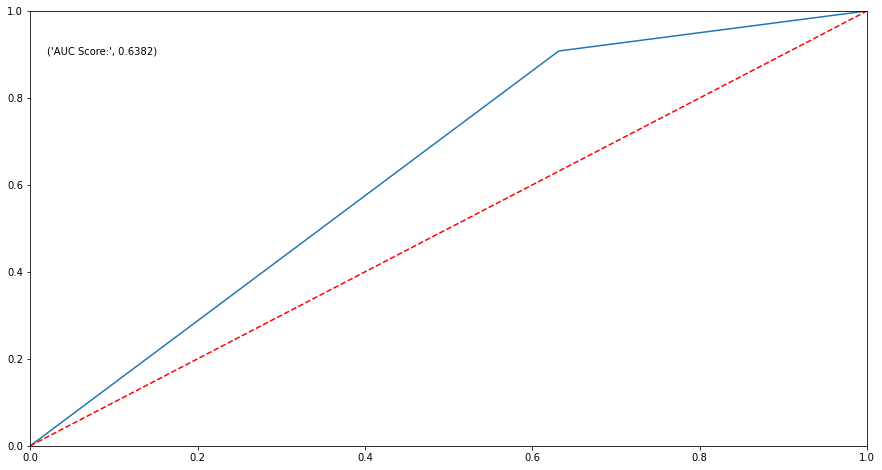

In [112]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, ypred),4)))
plt.show()

In [116]:
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m=pd.Series({'Model':'Base Logit',
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(ytest,ypred),2),
             'recall':round(recall_score(ytest,ypred),2),
             'accuracy':round(accuracy_score(ytest,ypred),2),
             'f1':round(f1_score(ytest,ypred),2),
             'auc':round(roc_auc_score(ytest,ypred),4)
            })
result=result.append(m,ignore_index=True)

In [117]:
result

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy,f1,auc
0,Base Logit,2784,2077,707,0.77,0.91,0.75,0.83,0.6382


In [119]:
l.params[l.pvalues>0.05].index

Index(['Race', 'Gender', 'Days In Hospital', 'Num_Lab_Procedures',
       'Max_Glu_Serum', 'A1Cresult', 'Glipizide', 'Glyburide-Metformin'],
      dtype='object')

In [123]:
xtrain=xtrain.drop(['Race', 'Gender', 'Days In Hospital', 'Num_Lab_Procedures',
       'Max_Glu_Serum', 'A1Cresult', 'Glipizide', 'Glyburide-Metformin'],axis=1)
xtest1=xtest.drop(['Race', 'Gender', 'Days In Hospital', 'Num_Lab_Procedures',
       'Max_Glu_Serum', 'A1Cresult', 'Glipizide', 'Glyburide-Metformin'],axis=1)

In [124]:
l=sm.Logit(ytrain,xtrain).fit()
l.summary()

Optimization terminated successfully.
         Current function value: 0.542348
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Readmitted   No. Observations:                25576
Model:                          Logit   Df Residuals:                    25560
Method:                           MLE   Df Model:                           15
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.1189
Time:                        15:42:44   Log-Likelihood:                -13871.
converged:                       True   LL-Null:                       -15744.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.8021      0.289      9.693      0.000       2.235       3.369
Age                       0.0269      0.009      2.858      0.004       0.008       0.045
Weight                   -0.1212      0.030     -4.031      0.000      -0.180      -0.062
Admission Type            0.0956      0.043      2.246      0.025       0.012       0.179
Discharge Disposition    -0.3446      0.016    -22.169      0.000      -0.375      -0.314
Admission Source         -0.2923      0.026    -11.195      0.000      -0.343      -0.241
Payer_Code                0.0967      0.012      8.126      0.000       0.073       0.120
Medical_Specialty        -0.0118      0.005     -2.340      0.019      -0.022      -0.002
Num_Medications           0.0155      0.002      7.079      0.000       0.011       0.020
Number_Diagnoses         -0.7721      0.018    -41.859      0.000      -0.808      -0.736
Metformin                -0.1475      0.036     -4.063      0.000      -0.219      -0.076
Repaglinide               0.2776      0.120      2.321      0.020       0.043       0.512
Tolazamide               -1.8347      0.710     -2.583      0.010      -3.227      -0.443
Insulin                  -0.3430      0.019    -18.136      0.000      -0.380      -0.306
Change                   -0.2502      0.036     -6.993      0.000      -0.320      -0.180
Diabetesmed              -0.3802      0.042     -9.099      0.000      -0.462      -0.298
=========================================================================================
"""

In [125]:
ypred_prob = l.predict(xtest1)
ypred = [ 0 if x < 0.5 else 1 for x in ypred_prob]
cm = confusion_matrix(ytest, ypred)
cm

array([[1214, 2075],
       [ 708, 6965]], dtype=int64)

In [126]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.63      0.37      0.47      3289
           1       0.77      0.91      0.83      7673

    accuracy                           0.75     10962
   macro avg       0.70      0.64      0.65     10962
weighted avg       0.73      0.75      0.72     10962



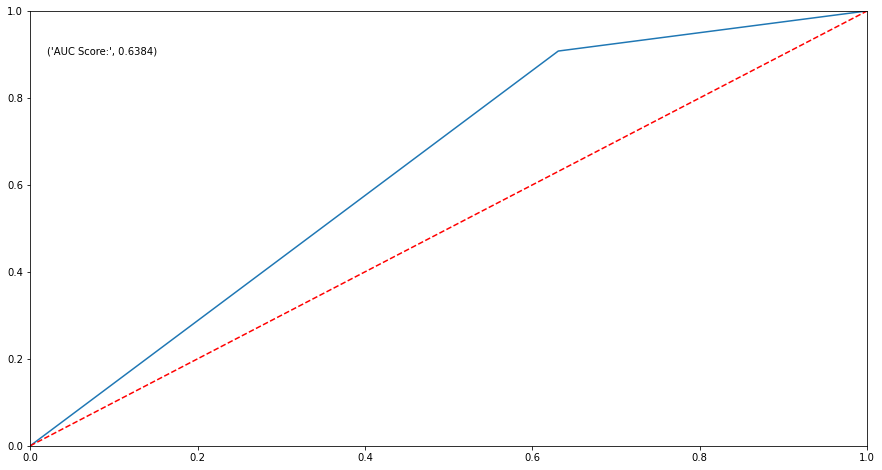

In [127]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, ypred),4)))
plt.show()

In [128]:
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m=pd.Series({'Model':'Logit signi',
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(ytest,ypred),2),
             'recall':round(recall_score(ytest,ypred),2),
             'accuracy':round(accuracy_score(ytest,ypred),2),
             'f1':round(f1_score(ytest,ypred),2),
             'auc':round(roc_auc_score(ytest,ypred),4)
            })
result=result.append(m,ignore_index=True)
result

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy,f1,auc
0,Base Logit,2784,2077,707,0.77,0.91,0.75,0.83,0.6382
1,Logit signi,2783,2075,708,0.77,0.91,0.75,0.83,0.6384


In [ ]:
xtrain=xtrain.drop('const',axis=1)
xtest1=xtest1.drop('const',axis=1)

In [133]:
knn_classification = KNeighborsClassifier()
knn_model = knn_classification.fit(xtrain, ytrain)
ypred = knn_model.predict(xtest1)
cm = confusion_matrix(ytest, ypred)
cm

array([[1382, 1907],
       [1049, 6624]], dtype=int64)

In [134]:
def get_test_report(model, test_data): 
    testpred = model.predict(test_data)
    return(classification_report(ytest, testpred))

In [135]:
test_report = get_test_report(knn_model, test_data=xtest1)
print(test_report)

              precision    recall  f1-score   support

           0       0.57      0.42      0.48      3289
           1       0.78      0.86      0.82      7673

    accuracy                           0.73     10962
   macro avg       0.67      0.64      0.65     10962
weighted avg       0.71      0.73      0.72     10962



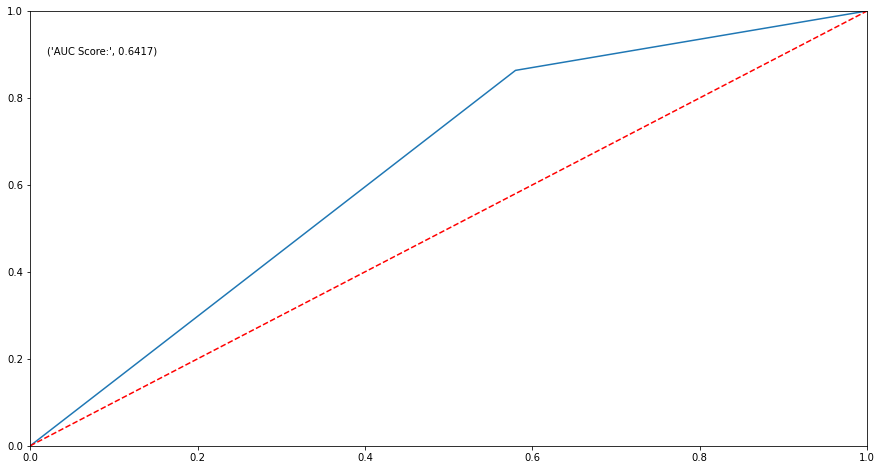

In [136]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, ypred),4)))
plt.show()

In [137]:
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m=pd.Series({'Model':'Base KNN',
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(ytest,ypred),2),
             'recall':round(recall_score(ytest,ypred),2),
             'accuracy':round(accuracy_score(ytest,ypred),2),
             'f1':round(f1_score(ytest,ypred),2),
             'auc':round(roc_auc_score(ytest,ypred),4)
            })
result=result.append(m,ignore_index=True)
result

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy,f1,auc
0,Base Logit,2784,2077,707,0.77,0.91,0.75,0.83,0.6382
1,Logit signi,2783,2075,708,0.77,0.91,0.75,0.83,0.6384
2,Base KNN,2956,1907,1049,0.78,0.86,0.73,0.82,0.6417


In [139]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 1),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')
knn_grid.fit(xtrain,ytrain)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'hamming', 'n_neighbors': 21} 



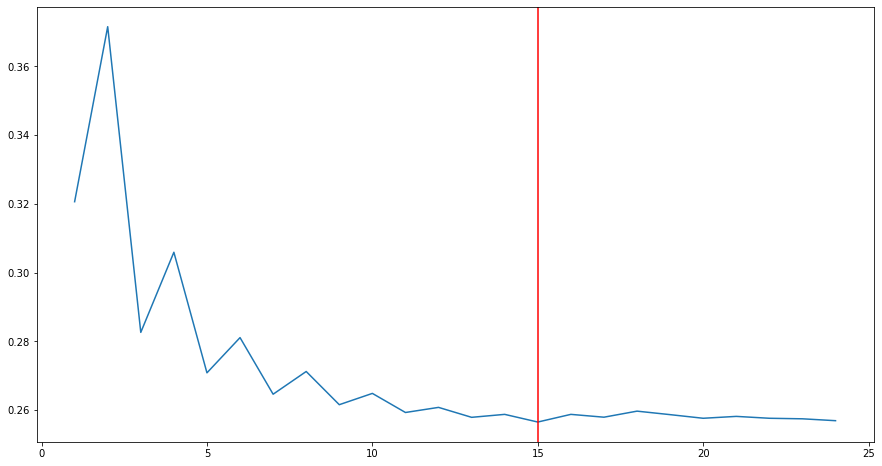

In [142]:
error_rate = []
for i in np.arange(1,25,1):
    knn = KNeighborsClassifier(i, metric = 'euclidean')
    score = cross_val_score(knn,xtrain, ytrain, cv = 5)
    score = score.mean() 
    error_rate.append(1 - score)
plt.plot(range(1,25,1), error_rate)
plt.axvline(x = 15, color = 'red')

In [144]:
knn_classification = KNeighborsClassifier(n_neighbors = 15,metric='hamming')
knn_model = knn_classification.fit(xtrain, ytrain)
ypred = knn_model.predict(xtest1)
cm = confusion_matrix(ytest, ypred)
cm

array([[1401, 1888],
       [ 726, 6947]], dtype=int64)

In [145]:
test_report = get_test_report(knn_model, test_data=xtest1)
print(test_report)

              precision    recall  f1-score   support

           0       0.66      0.43      0.52      3289
           1       0.79      0.91      0.84      7673

    accuracy                           0.76     10962
   macro avg       0.72      0.67      0.68     10962
weighted avg       0.75      0.76      0.74     10962



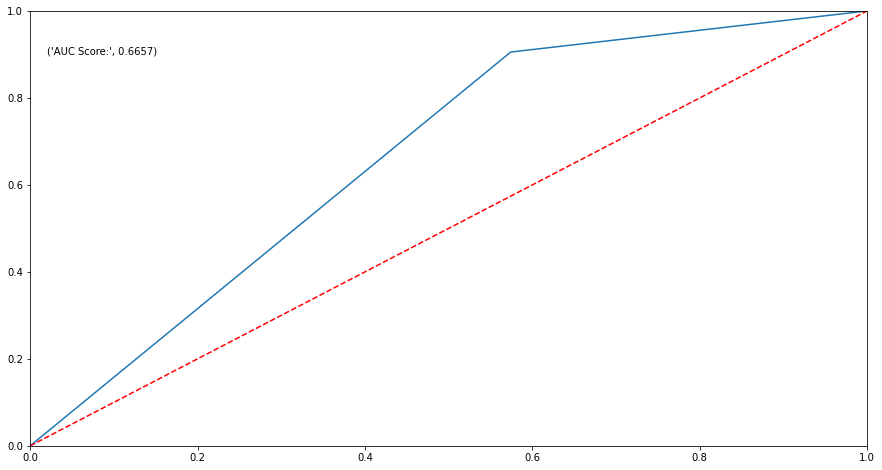

In [146]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, ypred),4)))
plt.show()

In [147]:
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m=pd.Series({'Model':'KNN grid',
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(ytest,ypred),2),
             'recall':round(recall_score(ytest,ypred),2),
             'accuracy':round(accuracy_score(ytest,ypred),2),
             'f1':round(f1_score(ytest,ypred),2),
             'auc':round(roc_auc_score(ytest,ypred),4)
            })
result=result.append(m,ignore_index=True)
result

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy,f1,auc
0,Base Logit,2784,2077,707,0.77,0.91,0.75,0.83,0.6382
1,Logit signi,2783,2075,708,0.77,0.91,0.75,0.83,0.6384
2,Base KNN,2956,1907,1049,0.78,0.86,0.73,0.82,0.6417
3,KNN grid,2614,1888,726,0.79,0.91,0.76,0.84,0.6657


In [148]:
knn_classification = KNeighborsClassifier(n_neighbors = 21,metric='hamming')
knn_model = knn_classification.fit(xtrain, ytrain)
ypred = knn_model.predict(xtest1)
cm = confusion_matrix(ytest, ypred)
cm

array([[1300, 1989],
       [ 654, 7019]], dtype=int64)

In [149]:
test_report = get_test_report(knn_model, test_data=xtest1)
print(test_report)

              precision    recall  f1-score   support

           0       0.67      0.40      0.50      3289
           1       0.78      0.91      0.84      7673

    accuracy                           0.76     10962
   macro avg       0.72      0.66      0.67     10962
weighted avg       0.75      0.76      0.74     10962



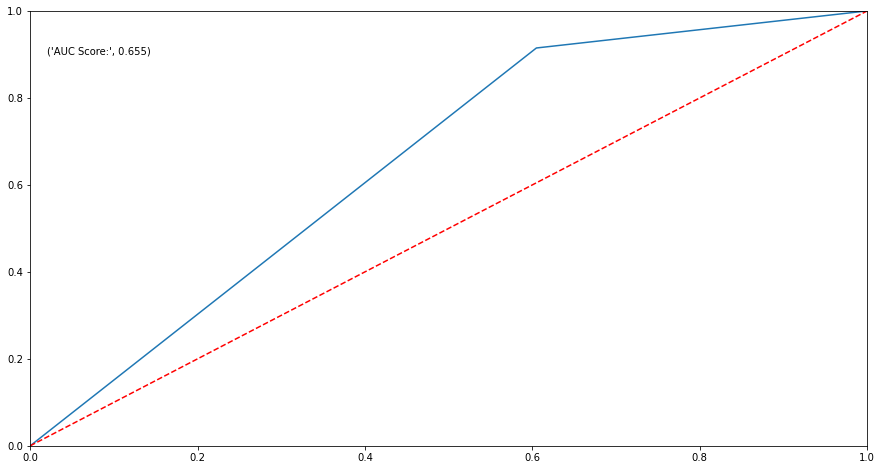

In [150]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, ypred),4)))
plt.show()

# Final Result table and selection of model

In [151]:
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m=pd.Series({'Model':'KNN grid 2',
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(ytest,ypred),2),
             'recall':round(recall_score(ytest,ypred),2),
             'accuracy':round(accuracy_score(ytest,ypred),2),
             'f1':round(f1_score(ytest,ypred),2),
             'auc':round(roc_auc_score(ytest,ypred),4)
            })
result=result.append(m,ignore_index=True)
result

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy,f1,auc
0,Base Logit,2784,2077,707,0.77,0.91,0.75,0.83,0.6382
1,Logit signi,2783,2075,708,0.77,0.91,0.75,0.83,0.6384
2,Base KNN,2956,1907,1049,0.78,0.86,0.73,0.82,0.6417
3,KNN grid,2614,1888,726,0.79,0.91,0.76,0.84,0.6657
4,KNN grid 2,2643,1989,654,0.78,0.91,0.76,0.84,0.6550


###  4th model has been selected as the final model as it has least type 2 error and with good accuracy

In [153]:
xtrain.columns

Index(['Age', 'Weight', 'Admission Type', 'Discharge Disposition',
       'Admission Source', 'Payer_Code', 'Medical_Specialty',
       'Num_Medications', 'Number_Diagnoses', 'Metformin', 'Repaglinide',
       'Tolazamide', 'Insulin', 'Change', 'Diabetesmed'],
      dtype='object')

In [165]:
df3=df1[['Patient_Nbr','Age', 'Weight', 'Admission Type', 'Discharge Disposition',
       'Admission Source', 'Payer_Code', 'Medical_Specialty',
       'Num_Medications', 'Number_Diagnoses', 'Metformin', 'Repaglinide',
       'Tolazamide', 'Insulin', 'Change', 'Diabetesmed']]

In [166]:
df3.head()

,Patient_Nbr,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Payer_Code,Medical_Specialty,Num_Medications,Number_Diagnoses,Metformin,Repaglinide,Tolazamide,Insulin,Change,Diabetesmed
0,12866,[80-90),Unknown,Not Available,Discharged,Referral,Unknown,Surgery,27,Above 5,No,No,No,Steady,Ch,Yes
1,27788,[50-60),Unknown,Emergency,Discharged,Emergency Room,MC,Surgery,8,Above 5,No,No,No,Down,Ch,Yes
2,50211,[40-50),Unknown,Emergency,Discharged,Referral,HM,Others,11,Above 5,No,No,No,No,No,No
3,79,[80-90),Unknown,Emergency,Discharged,Emergency Room,MC,Surgery,14,Above 5,No,No,No,No,No,Yes
4,47633,[70-80),Unknown,Not Available,Discharged,Not Available,Unknown,Surgery,7,Between 03 to 05,No,No,No,No,No,Yes


In [167]:
df3.set_index('Patient_Nbr',inplace=True)

In [168]:
df3.columns

Index(['Age', 'Weight', 'Admission Type', 'Discharge Disposition',
       'Admission Source', 'Payer_Code', 'Medical_Specialty',
       'Num_Medications', 'Number_Diagnoses', 'Metformin', 'Repaglinide',
       'Tolazamide', 'Insulin', 'Change', 'Diabetesmed'],
      dtype='object')

In [169]:
df3.Weight.replace('Unknown','[75-100)',inplace=True)

In [170]:
df3['Admission Type'].replace('Not Available','Emergency',inplace=True)

In [171]:
df3['Admission Source'].replace('Not Available','Emergency Room',inplace=True)

In [172]:
le=LabelEncoder()
for i in df3.select_dtypes(object).columns:
    df3[i]=le.fit_transform(df3[i])

In [173]:
df3.head()

,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Payer_Code,Medical_Specialty,Num_Medications,Number_Diagnoses,Metformin,Repaglinide,Tolazamide,Insulin,Change,Diabetesmed
Patient_Nbr,,,,,,,,,,,,,,,
12866,8,5,1,1,1,4,8,27,0,1,0,0,2,0,1
27788,5,5,1,1,0,2,8,8,0,1,0,0,0,0,1
50211,4,5,1,1,1,1,6,11,0,1,0,0,1,1,0
79,8,5,1,1,0,2,8,14,0,1,0,0,1,1,1
47633,7,5,1,1,0,4,8,7,2,1,0,0,1,1,1


In [176]:
y.head()

Patient_Nbr
8390     1
20012    1
50903    1
50636    0
205      0
Name: Readmitted, dtype: int32

In [179]:
ypred = knn_model.predict(df3)

In [181]:
df3['Readmitted']=ypred

In [182]:
df3.head()

,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Payer_Code,Medical_Specialty,Num_Medications,Number_Diagnoses,Metformin,Repaglinide,Tolazamide,Insulin,Change,Diabetesmed,Readmitted
Patient_Nbr,,,,,,,,,,,,,,,,
12866,8,5,1,1,1,4,8,27,0,1,0,0,2,0,1,0
27788,5,5,1,1,0,2,8,8,0,1,0,0,0,0,1,1
50211,4,5,1,1,1,1,6,11,0,1,0,0,1,1,0,1
79,8,5,1,1,0,2,8,14,0,1,0,0,1,1,1,1
47633,7,5,1,1,0,4,8,7,2,1,0,0,1,1,1,1


In [183]:
df1['Readmitted']=ypred

In [187]:
df1.Readmitted=df1.Readmitted.map({1:'Yes',0:'No'})

In [188]:
df1

,Patient_Nbr,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,...,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed,Readmitted
0,12866,Caucasian,Male,[80-90),Unknown,Not Available,Discharged,Referral,Above 9,Unknown,...,No,Steady,No,No,No,No,No,Ch,Yes,No
1,27788,Caucasian,Male,[50-60),Unknown,Emergency,Discharged,Emergency Room,Between 03 to 06,MC,...,No,Down,No,No,No,No,No,Ch,Yes,Yes
2,50211,Caucasian,Female,[40-50),Unknown,Emergency,Discharged,Referral,Below 3,HM,...,No,No,No,No,No,No,No,No,No,Yes
3,79,Caucasian,Male,[80-90),Unknown,Emergency,Discharged,Emergency Room,Between 03 to 06,MC,...,No,No,No,No,No,No,No,No,Yes,Yes
4,47633,Caucasian,Female,[70-80),Unknown,Not Available,Discharged,Not Available,Between 03 to 06,Unknown,...,No,No,No,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,21797,Caucasian,Male,[60-70),Unknown,Emergency,Discharged,Referral,Between 03 to 06,HM,...,No,Steady,No,No,No,No,No,No,Yes,No
2031,46334,Caucasian,Male,[60-70),Unknown,Elective,Discharged,Referral,Above 9,MC,...,No,No,No,No,No,No,No,No,No,Yes
2032,2388,Caucasian,Male,[70-80),Unknown,Emergency,Discharged,Emergency Room,Between 06 to 09,Unknown,...,No,No,No,No,No,No,No,No,No,Yes
2033,50773,Caucasian,Male,[70-80),Unknown,Emergency,Discharged,Referral,Below 3,MC,...,No,No,No,No,No,No,No,No,Yes,Yes


In [189]:
df1.Readmitted.value_counts()

Yes    1666
No      369
Name: Readmitted, dtype: int64

### Out of 2035 1666 were readmitted and 369 were not admitted as predicted by the model that has been selected as best fit